In [48]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

from sklearn import metrics


titanic_data = pd.read_csv('/Users/vishruta/Desktop/Blackboard/Fall 2020/Predictive Analytics/WEEK 3/titanic.csv')
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [49]:
titanic_data.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

for col in titanic_data.columns:
    print("\n" + col)
    print(titanic_data[col].value_counts()) 

### Data Cleaning

<Figure size 432x288 with 0 Axes>

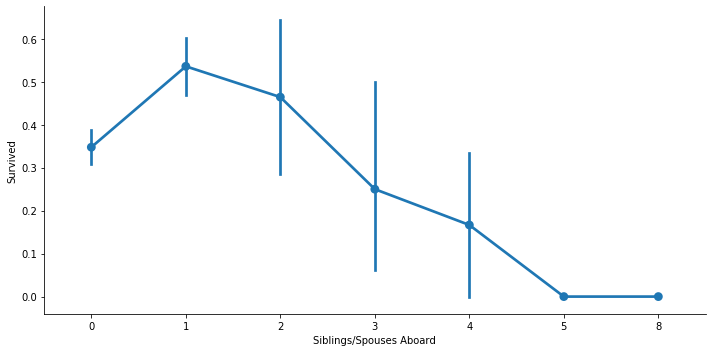

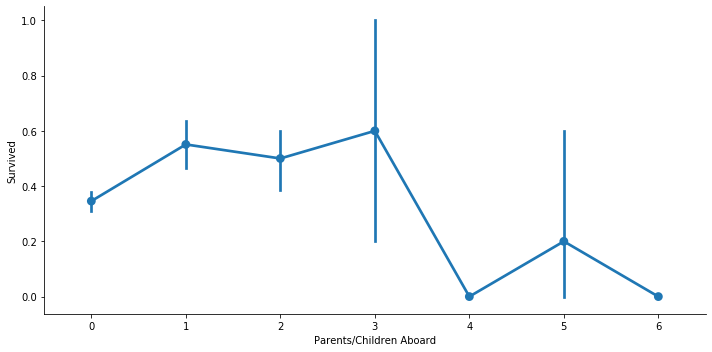

In [50]:
for i, col in enumerate(['Siblings/Spouses Aboard', 'Parents/Children Aboard']):
    plt.figure(i)
    sns.catplot(x=col, y= 'Survived', data= titanic_data, kind='point', aspect=2)

In [51]:
## Combined Siblings/Spouse and Parent/Children into one column as Family_Cnt

titanic_data['Family_cnt'] = titanic_data['Siblings/Spouses Aboard'] + titanic_data['Parents/Children Aboard']
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_cnt
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,0
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,3
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,0


In [52]:
titanic_data['Family_cnt'].value_counts()

0     533
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_cnt, dtype: int64

In [53]:
titanic_data.drop(['Siblings/Spouses Aboard','Parents/Children Aboard','Name'], axis = 1, inplace=True)
titanic_data

,Survived,Pclass,Sex,Age,Fare,Family_cnt
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,1
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,1
4,0,3,male,35.0,8.0500,0
...,...,...,...,...,...,...
882,0,2,male,27.0,13.0000,0
883,1,1,female,19.0,30.0000,0
884,0,3,female,7.0,23.4500,3
885,1,1,male,26.0,30.0000,0


In [54]:
## Categorical Variables to Numerical variable

gender = {'male' : 0 , 'female' : 1}
titanic_data['Sex'] = titanic_data['Sex'].map(gender)
titanic_data

,Survived,Pclass,Sex,Age,Fare,Family_cnt
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
882,0,2,0,27.0,13.0000,0
883,1,1,1,19.0,30.0000,0
884,0,3,1,7.0,23.4500,3
885,1,1,0,26.0,30.0000,0


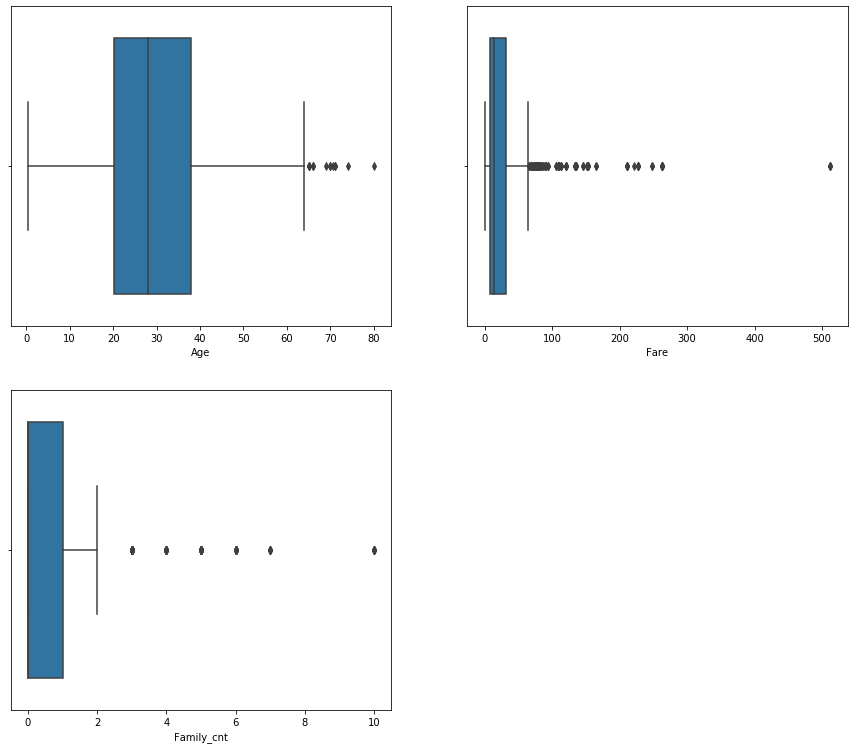

In [55]:
plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.boxplot(titanic_data['Age'])
plt.subplot(3,2,2)
sns.boxplot(titanic_data['Fare'])
plt.subplot(3,2,3)
sns.boxplot(titanic_data['Family_cnt'])

(878, 6)


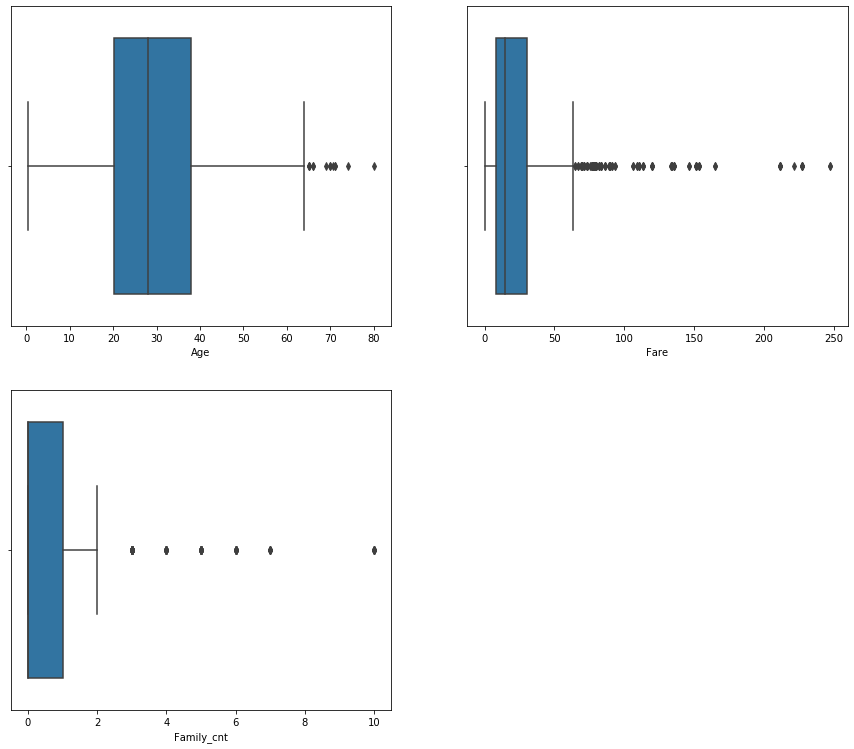

In [56]:
#Treating Outlier of MntWines
q1 = titanic_data['Fare'].quantile(0.01)
q4 = titanic_data['Fare'].quantile(0.99)
titanic_data = titanic_data[(titanic_data['Fare']>=q1) & (titanic_data['Fare']<=q4)]
print(titanic_data.shape)

plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.boxplot(titanic_data['Age'])
plt.subplot(3,2,2)
sns.boxplot(titanic_data['Fare'])
plt.subplot(3,2,3)
sns.boxplot(titanic_data['Family_cnt'])

(871, 6)


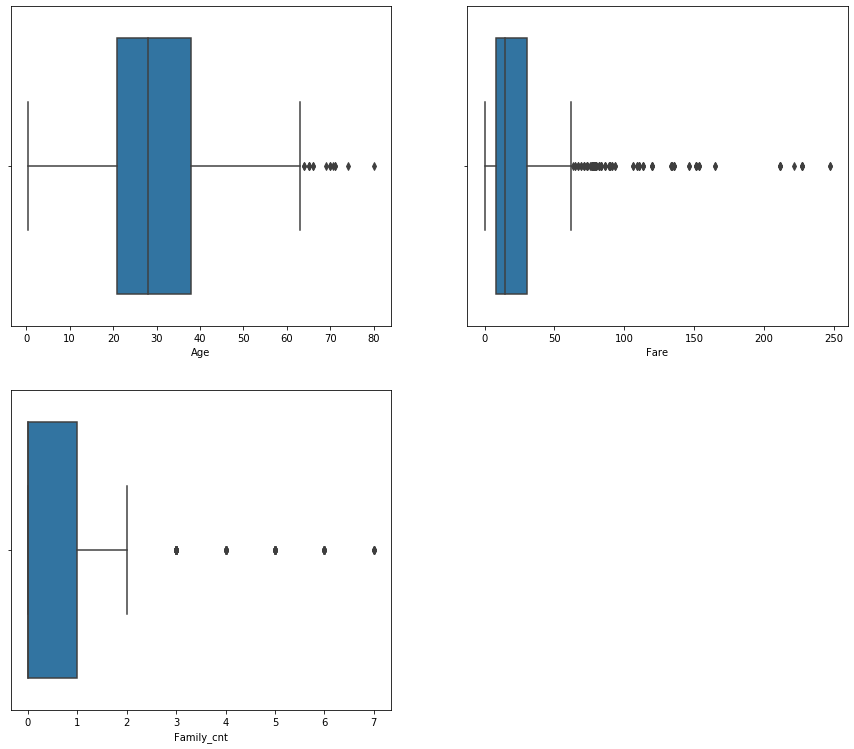

In [57]:
#Treating Outlier of MntWines
q1 = titanic_data['Family_cnt'].quantile(0.01)
q4 = titanic_data['Family_cnt'].quantile(0.99)
titanic_data = titanic_data[(titanic_data['Family_cnt']>=q1) & (titanic_data['Family_cnt']<=q4)]
print(titanic_data.shape)

plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.boxplot(titanic_data['Age'])
plt.subplot(3,2,2)
sns.boxplot(titanic_data['Fare'])
plt.subplot(3,2,3)
sns.boxplot(titanic_data['Family_cnt'])

### Predictive Models

In [58]:
## Splitting Data
from sklearn.model_selection import train_test_split
features = titanic_data.drop(['Survived'], axis=1)
target = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state = 100)


In [59]:
decision_tree = DecisionTreeClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
decision_tree.fit(X_train,y_train)
y_pred1=decision_tree.predict(X_test)
print('Decision Tree')
dt_accuracy = metrics.accuracy_score(y_test, y_pred1)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1)*100)
print (classification_report(y_test, y_pred1))

Decision Tree
Accuracy: 78.2442748091603
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       156
           1       0.80      0.61      0.70       106

    accuracy                           0.78       262
   macro avg       0.79      0.76      0.76       262
weighted avg       0.79      0.78      0.78       262



In [60]:
gradient_boost = GradientBoostingClassifier()
#Train the model using the training sets y_pred=clf.predict(X_test)
gradient_boost.fit(X_train,y_train)
y_pred2=gradient_boost.predict(X_test)
print('Gradient Boosting')
gb_accuracy = metrics.accuracy_score(y_test, y_pred2)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2)*100)
print (classification_report(y_test, y_pred2))

Gradient Boosting
Accuracy: 81.29770992366412
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       156
           1       0.85      0.65      0.74       106

    accuracy                           0.81       262
   macro avg       0.82      0.79      0.80       262
weighted avg       0.82      0.81      0.81       262



In [61]:
logistic_regression = LogisticRegression()
#Train the model using the training sets y_pred=clf.predict(X_test)
logistic_regression.fit(X_train,y_train)
y_pred3=logistic_regression.predict(X_test)
print('Logistic Regression')
lr_accuracy=metrics.accuracy_score(y_test, y_pred3)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3)*100)
print (classification_report(y_test, y_pred3))

Logistic Regression
Accuracy: 80.1526717557252
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       156
           1       0.81      0.67      0.73       106

    accuracy                           0.80       262
   macro avg       0.80      0.78      0.79       262
weighted avg       0.80      0.80      0.80       262



In [62]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression'],
    'Score': [dt_accuracy, gb_accuracy, lr_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Gradient Boosting,81.297710
2,Logistic Regression,80.152672
0,Decision Tree,78.244275


### Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

### Decision Tree

In [17]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std , params in zip(means , stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std *2,3),params))


In [18]:
dt = DecisionTreeClassifier()
parameters1 = {
    'max_leaf_nodes': list(range(2, 100)), 
    'min_samples_split': [2, 3, 4],
    'criterion' : ['gini', 'entropy']
}

cv1 = GridSearchCV(dt, parameters1, cv=5)
cv1.fit(X_train, y_train.values.ravel())

print_results(cv1)


##grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
##grid_search_cv.fit(X_train, y_train)

BEST PARAMS: {'criterion': 'gini', 'max_leaf_nodes': 7, 'min_samples_split': 2}

0.793 (+/-0.071) for {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 2}
0.793 (+/-0.071) for {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 3}
0.793 (+/-0.071) for {'criterion': 'gini', 'max_leaf_nodes': 2, 'min_samples_split': 4}
0.782 (+/-0.049) for {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 2}
0.782 (+/-0.049) for {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 3}
0.782 (+/-0.049) for {'criterion': 'gini', 'max_leaf_nodes': 3, 'min_samples_split': 4}
0.783 (+/-0.042) for {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.783 (+/-0.042) for {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 3}
0.783 (+/-0.042) for {'criterion': 'gini', 'max_leaf_nodes': 4, 'min_samples_split': 4}
0.798 (+/-0.047) for {'criterion': 'gini', 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.798 (+/-0.047) for {'criterion': 'gin

In [19]:
cv1.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=7)

In [20]:
## Test Dataset
dt = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=7,min_samples_split=2)
dt = dt.fit(X_train,y_train)

In [21]:
dt_pred = dt.predict(X_test)

In [28]:
from sklearn import metrics
Decision_Tree_Accuracy = metrics.accuracy_score(y_test, dt_pred)*100
dt_tunned_accuracy = metrics.accuracy_score(y_test, dt_pred)*100
print("Accuracy", metrics.accuracy_score(y_test, dt_pred)*100)

Accuracy 81.29770992366412


### Gradient Boosting

In [29]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std , params in zip(means , stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std *2,3),params))

In [30]:
gb = GradientBoostingClassifier()
parameters2 = {
    'n_estimators' : [5, 50, 250, 500],
    'max_depth' : [1, 3, 5, 7, 9],
    'learning_rate' : [0.01, 0.1, 1, 10, 100]
}

cv2 = GridSearchCV(gb, parameters2, cv=5)
cv2.fit(X_train, y_train.values.ravel())

print_results(cv2)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.793 (+/-0.071) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.791 (+/-0.066) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.796 (+/-0.062) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.801 (+/-0.041) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.824 (+/-0.037) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.828 (+/-0.053) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.004) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.783 (+/-0.042) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.054) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.823 (+/-0.056) for {'learning_

In [31]:
cv2.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [32]:
best_result2 = cv2.best_score_
print(best_result2)

0.8275843381655601


In [33]:
## Test Dataset
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=500)
gb = gb.fit(X_train,y_train)

In [34]:
gb_pred = gb.predict(X_test)

In [35]:
gb_tunned_accuracy = metrics.accuracy_score(y_test, gb_pred)*100
print("Accuracy", metrics.accuracy_score(y_test, gb_pred)*100)

Accuracy 82.44274809160305


### Logistic Regression

In [36]:
## Logistic Regression
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std , params in zip(means , stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std *2,3),params))

In [37]:
lr = LogisticRegression()
parameters4 = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv4 = GridSearchCV(lr, parameters4, cv=5)
cv4.fit(X_train, y_train.values.ravel())

print_results(cv4)

BEST PARAMS: {'C': 10}

0.663 (+/-0.044) for {'C': 0.001}
0.713 (+/-0.019) for {'C': 0.01}
0.79 (+/-0.067) for {'C': 0.1}
0.796 (+/-0.086) for {'C': 1}
0.8 (+/-0.092) for {'C': 10}
0.8 (+/-0.092) for {'C': 100}
0.8 (+/-0.092) for {'C': 1000}


In [38]:
cv4.best_params_

{'C': 10}

In [39]:
best_result4 = cv4.best_score_
print(best_result4)

0.7996341959084134


In [40]:
## Test Dataset
lr = LogisticRegression(C=10)
lr = lr.fit(X_train,y_train)

In [41]:
lr_pred = lr.predict(X_test)

In [42]:
lr_tunned_accuracy = metrics.accuracy_score(y_test, lr_pred)*100
print("Accuracy", metrics.accuracy_score(y_test, lr_pred)*100)

Accuracy 80.1526717557252


In [45]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'Gradient Boosting', 'Logistic Regression'],
    'Score': [dt_accuracy, gb_accuracy, lr_accuracy],
    'Tunned Score': [dt_tunned_accuracy, gb_tunned_accuracy, lr_tunned_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score,Tunned Score
1,Gradient Boosting,81.297710,82.442748
2,Logistic Regression,80.152672,80.152672
0,Decision Tree,79.770992,81.297710
